# Michaela Allen - HW Set 6 - Computational Physics
## Due March 24, 2020
---


**Problem 1: Terminal Velocity**

When jumping from an airplane, you will most often have a parachute to slow your fall.  Here let's consider a very simple example in which the frictional drag force is linearly dependent on the velocity:

$$
\frac{dv}{dt} = a - bv
$$

where $a$ and $b$ are constants.  In our case $a$ corresponds to the acceleration due to gravity, and $b$ is a constant from drag.  Note that the drag force is negative, indicating it opposes the motion.  Use the Euler method to solve for $v$ as a function of time and plot your results.  A convenient choice of parameters is $a=10$ and $b=1$.  You should find that $v$ approaches a constant value at long times: this is the terminal velocity.   If you open your chute immediately after jumping from the plane, you will have $v_{\rm initial}\sim1$ m/s, but if you wait a minute or so, you will have $v_{\rm initial}\sim50$  m/s.  Plot both $v(t)$ curves on the same plot with a legend.

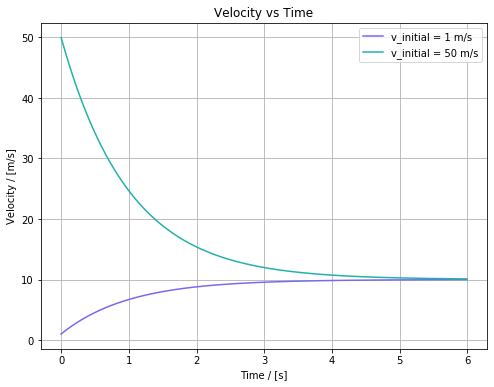

In [61]:
# Problem 1: Terminal Velocity
# Using Euler method

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

a = 10
b = 1

start = 0.0
end = 6.0 # chose 6 seconds to see that both initial velocities will converge to same terminal velocity
N = 1000
h = (end - start) / N

v = 1 # [m/s]
v2 = 50 # [m/s]

# define dv/dt function:

def f(v,t):
    return a - b*v

# define range of time points and empty sets to append velocity values to:

t_points = np.arange(start, end, h)
v_points = []
v_points2 = []

# now run two loops to calculate velocity values from each intial value:

for t in t_points:
    v_points.append(v)
    v += h * f(v,t)
    
for t in t_points:
    v_points2.append(v2)
    v2 += h * f(v2, t)
    
# now plot velocity vs time:

fig = plt.figure(figsize=[8, 6])
plt.plot(t_points, v_points, color='mediumslateblue', label='v_initial = 1 m/s')
plt.plot(t_points, v_points2, color='lightseagreen', label='v_initial = 50 m/s')
plt.title('Velocity vs Time')
plt.xlabel('Time / [s]')
plt.ylabel('Velocity / [m/s]')
plt.legend()
plt.grid()
plt.show()

---


**Problem 2: Coupled Radioactive Decay**

Here is a radioactive decay problem involving two types of nuclei
$A$ and $B$ with populations $N_A(t)$ and $N_B(t)$.  Given that type $A$ nuclei
decay to form type $B$ nuclei, when then also decay according to

\begin{align}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A}\\
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}
\end{align}

where $\tau_A$ and $\tau_B$ are the decay time constants for each time of nucleus.  Use the Euler, RK2, or RK4 method to solve these coupled equations for $N_A$ and $N_B$ as functions of time.  Explore the behavior found for different values of the ratio $\tau_A/\tau_B$.  


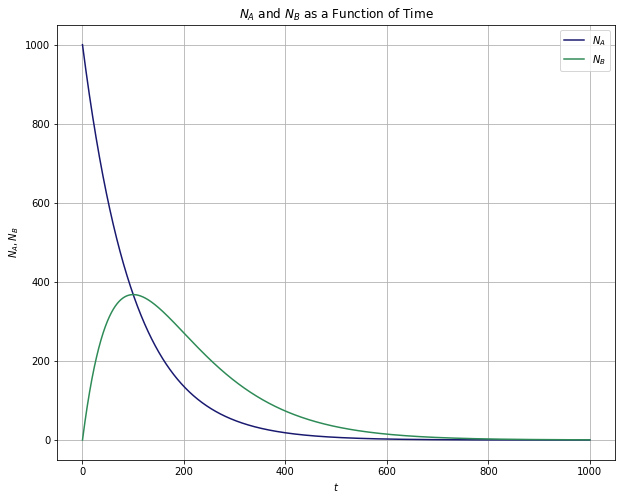

In [62]:
# Problem 2 - Coupled Radioactive Decay
# using RK4 method

# necessary imports

import numpy as np
import matplotlib.pyplot as plt

# define function that includes the equations we want to solve:

def f(r,t):
    
    ratio = 1.0
    tau_A = 100
    tau_B = ratio*tau_A
    
    N_A = r[0]
    N_B = r[1]
    fNA = -N_A / tau_A
    fNB = (N_A / tau_A) - (N_B / tau_B)
    
    return np.array([fNA, fNB], float)

# set up our time points and empty sets to append N_A and N_B points to:

t_start = 0
t_end = 1000
N = 10000
h = (t_end - t_start) / N

t_points = np.arange(t_start, t_end, h)
NA_points = []
NB_points = []

r = np.array([1000, 0], float)

# do RK4 method:

for t in t_points:
    NA_points.append(r[0])
    NB_points.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# now plot both the sets of points vs time on same plot:
    
fig = plt.figure(figsize=[10, 8])
plt.plot(t_points, NA_points, color='midnightblue', label='$N_{A}$')
plt.plot(t_points, NB_points, color='seagreen', label='$N_{B}$')
plt.title('$N_{A}$ and $N_{B}$ as a Function of Time')
plt.xlabel('$t$')
plt.ylabel('$N_{A}, N_{B}$')
plt.legend()
plt.grid()
plt.show()

---

**Problem 3: Cannon Shell Trajectories**

(a) Use your method of choice to calculate cannon shell trajectories ignoring both air drag and the effect of air density.  Plot your results for $v_{init}=700$ m/s, and firing angles of 30, 40, 45, and 50 degrees.  Compare your results (max height and range) with the exact solution, and with the figure on the left.  Use the values in the figure caption.  

(b) Next, include the drag force and reproduce the figure on the right.  Note the scales have changed. 

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon1.png" />


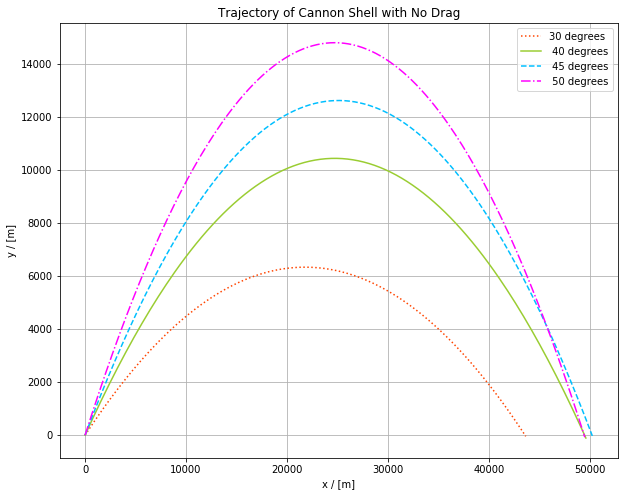

In [63]:
# Problem 3 - Cannon Shell Trajectories - a)

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

#define function that is just f(theta) to easily calculate all of the different trajectories:

def f(theta):

    dt = 0.5 # defining a small dt

    x_points = [0.0] # initializing our x and y while also making a list
    y_points = [0.0]

    v_initial = [700.0] # same as above but with our initial velocity

    vx = [700.0 * np.cos(theta)] # calculating the specific x and y components of velocity
    vy = [700.0 * np.sin(theta)]

    while y_points[-1] >= 0:                         # using a while loop to keep calculating until y is 0--
        x_new = x_points[-1] + vx[-1]*dt             # i.e. until the shell hits the ground.
        vx_new = vx[-1]
        y_new = y_points[-1] + vy[-1]*dt             # just calculating each new position and velocity and appending
        vy_new = vy[-1] - g*dt                       # each value.
        v_new = np.sqrt(vx_new**2 + vy_new**2)
    
        x_points.append(x_new)
        vx.append(vx_new)
        y_points.append(y_new)
        vy.append(vy_new)
        v_initial.append(v_new)

    return (x_points, y_points)


# now using above function to calculate trajectories for each of the thetas:

theta1 = 30 * (np.pi/180)
vals1 = f(theta1)

theta2 = 40 * (np.pi/180)
vals2 = f(theta2)

theta3 = 45 * (np.pi/180)
vals3 = f(theta3)

theta4 = 50 * (np.pi/180)
vals4 = f(theta4)

# and now plotting them all on the same plot:

fig = plt.figure(figsize=[10, 8])
plt.plot(vals1[0], vals1[1], ':', color='orangered', label='30 degrees')
plt.plot(vals2[0], vals2[1], '-', color='yellowgreen', label=' 40 degrees')
plt.plot(vals3[0], vals3[1], '--', color='deepskyblue', label=' 45 degrees')
plt.plot(vals4[0], vals4[1], '-.', color='magenta', label=' 50 degrees')
plt.title('Trajectory of Cannon Shell with No Drag')
plt.xlabel('x / [m]')
plt.ylabel('y / [m]')
plt.legend()
plt.grid()
plt.show()

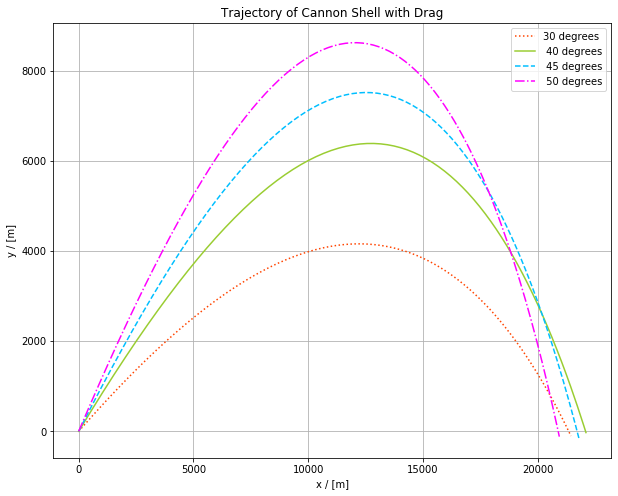

In [64]:
# Problem 3 - Cannon Shell Trajectories - b)
# now with air resistance!

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

#define function that is just f(theta) to easily calculate all of the different trajectories:

def f(theta):

    dt = 0.5 # defining a small dt
    C = 4e-5 # [m] # drag coefficient

    x_points = [0.0] # initializing our x and y while also making a list
    y_points = [0.0]

    v_initial = [700.0] # same as above but with our initial velocity

    vx = [700.0 * np.cos(theta)] # calculating the specific x and y components of velocity
    vy = [700.0 * np.sin(theta)]

    while y_points[-1] >= 0:                         # using a while loop to keep calculating until y is 0--
        x_new = x_points[-1] + vx[-1]*dt             # i.e. until the shell hits the ground.
        vx_new = vx[-1] - v_initial[-1]*C*vx[-1]*dt
        y_new = y_points[-1] + vy[-1]*dt                      # just calculating each new position and velocity
        vy_new = vy[-1] - g*dt - v_initial[-1]*C*vy[-1]*dt    # and appending each value.
        v_new = np.sqrt(vx_new**2 + vy_new**2)
    
        x_points.append(x_new)
        vx.append(vx_new)
        y_points.append(y_new)
        vy.append(vy_new)
        v_initial.append(v_new)


#     r = -float(y_points[-2]/y_points[-1])
#     xl = (x_points[-2]+r*x_points[-1])/(r+1)
#     yl=0
#     x_points[-1] = xl
#     y_points[-1] = yl

    return (x_points, y_points)


# now using above function to calculate trajectories for each of the thetas:

theta1 = 30 * (np.pi/180)
vals1 = f(theta1)

theta2 = 40 * (np.pi/180)
vals2 = f(theta2)

theta3 = 45 * (np.pi/180)
vals3 = f(theta3)

theta4 = 50 * (np.pi/180)
vals4 = f(theta4)

# and now plotting them all on the same plot:

fig = plt.figure(figsize=[10, 8])
plt.plot(vals1[0], vals1[1], ':', color='orangered', label='30 degrees')
plt.plot(vals2[0], vals2[1], '-', color='yellowgreen', label=' 40 degrees')
plt.plot(vals3[0], vals3[1], '--', color='deepskyblue', label=' 45 degrees')
plt.plot(vals4[0], vals4[1], '-.', color='magenta', label=' 50 degrees')
plt.title('Trajectory of Cannon Shell with Drag')
plt.xlabel('x / [m]')
plt.ylabel('y / [m]')
plt.legend()
plt.grid()
plt.show()

---

**Problem 4: Cannon Shells, variable air density**

For cannon shells, their trajectories take them into more rarified air, where the drag will be less.  If we assume a constant-temperature model, then we have

$$
\rho = \rho_0\exp(-y/y_0)
$$ 

where $\rho_0\approx 1.275\rm\ kg\ m^{-3}$ is the density of air at sea level, and $y_0\approx10^4$ m is the density scale height.

Assuming a constant temperature with height isn't the best approximation, and we might instead opt to use the adiabatic approximation

$$
\rho = \rho_0\left({1-\frac{ay}{T_0}}\right)^\alpha
$$

where $a\approx6.5\times10^{-3}$ K/m, $\alpha\approx2.5$ for air, and $T_0$ is the sea level temperature (in K).  Whichever you use, the drag force is proportional to density, so

$$
F^*_{drag} = \frac{\rho}{\rho_0}F_{drag}(y=0)
$$

Calculate the trajectory of our cannon shell including both air drag and the reduced air density at high altitudes so that you can reproduce the results in the figure below.  Perform your calculation for different firing angles and determine the value that gives the maximum range.  Try both options for density and plot on the same plot, including a legend so the information is clearly understandable.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon2.png" />


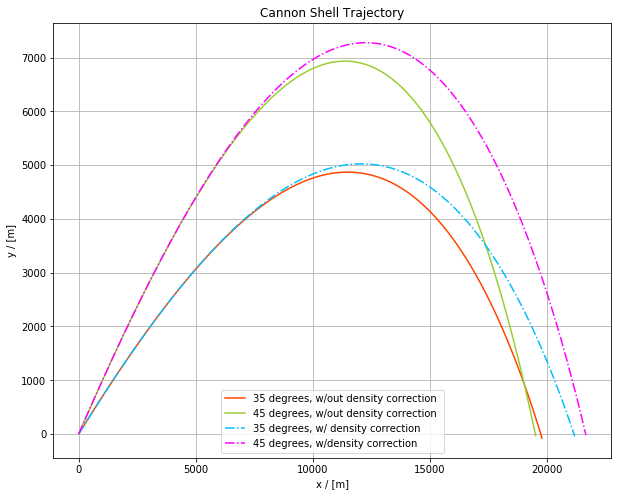

In [65]:
# Problem 4 - Cannon Shells, Variable Air Density

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# using same function as above, but including an extra function inside that is the the first density equation

def f_rho1(theta):
    
    rho_0 = 1.275 # [kg/m^3] air density at sea level
    y_0 = 10e4 # [m] density scale height
    T_0 = 288 # [K]
    a = 6.5e-3 # [K/m] 
    alpha = 2.5
    dt = 0.5 # defining a small dt
    C = 4e-5 # [m] # drag coefficient
    
    def rho1(y):
        return rho_0 * np.exp(-y / y_0)

    x_points = [0.0] # initializing our x and y while also making a list
    y_points = [0.0]

    v_initial = [700.0] # same as above but with our initial velocity

    vx = [700.0 * np.cos(theta)] # calculating the specific x and y components of velocity
    vy = [700.0 * np.sin(theta)]

    while y_points[-1] >= 0:                         # using a while loop to keep calculating until y is 0--
        x_new = x_points[-1] + vx[-1]*dt             # i.e. until the shell hits the ground.
        rho = rho1(y_points[-1])                     # calculating rho here to include below in vx_new
        vx_new = vx[-1] - rho*v_initial[-1]*C*vx[-1]*dt
        y_new = y_points[-1] + vy[-1]*dt                      # just calculating each new position and velocity
        vy_new = vy[-1] - g*dt - rho*v_initial[-1]*C*vy[-1]*dt    # and appending each value.
        v_new = np.sqrt(vx_new**2 + vy_new**2)
    
        x_points.append(x_new)
        vx.append(vx_new)
        y_points.append(y_new)
        vy.append(vy_new)
        v_initial.append(v_new)

    return (x_points, y_points)

# use that function to calculate trajectories at 35 and 45 degrees:

theta1 = 35 * (np.pi/180)
vals1 = f_rho1(theta1)

theta2 = 45 * (np.pi/180)
vals2 = f_rho1(theta2)

#####################################################################
# same as above, except out rho function is the one with the adiabatic approximation:

def f_rho2(theta):
    
    rho_0 = 1.275 # [kg/m^3] air density at sea level
    y_0 = 10e4 # [m] density scale height
    T_0 = 288 # [K]
    a = 6.5e-3 # [K/m] 
    alpha = 2.5
    dt = 0.5 # defining a small dt
    C = 4e-5 # [m] # drag coefficient

    def rho2(y):
        return rho_0 * (1 - a*y / T_0)**alpha

    x_points = [0.0] # initializing our x and y while also making a list
    y_points = [0.0]

    v_initial = [700.0] # same as above but with our initial velocity

    vx = [700.0 * np.cos(theta)] # calculating the specific x and y components of velocity
    vy = [700.0 * np.sin(theta)]

    while y_points[-1] >= 0:                         # using a while loop to keep calculating until y is 0--
        x_new = x_points[-1] + vx[-1]*dt             # i.e. until the shell hits the ground.
        rho = rho2(y_points[-1])                     # calculating rho here to include below in vx_new
        vx_new = vx[-1] - rho*v_initial[-1]*C*vx[-1]*dt
        y_new = y_points[-1] + vy[-1]*dt                      # just calculating each new position and velocity
        vy_new = vy[-1] - g*dt - rho*v_initial[-1]*C*vy[-1]*dt    # and appending each value.
        v_new = np.sqrt(vx_new**2 + vy_new**2)
    
        x_points.append(x_new)
        vx.append(vx_new)
        y_points.append(y_new)
        vy.append(vy_new)
        v_initial.append(v_new)

    return (x_points, y_points)

# use this function to calculate trajectories at 35 and 45 degrees:

theta1 = 35 * (np.pi/180)
vals12 = f_rho2(theta1)

theta2 = 45 * (np.pi/180)
vals22 = f_rho2(theta2)

# now plot both sets of data on the same plot:

fig = plt.figure(figsize=[10, 8])
plt.plot(vals1[0], vals1[1], '-', color='orangered', label='35 degrees, w/out density correction')
plt.plot(vals2[0], vals2[1], '-', color='yellowgreen', label='45 degrees, w/out density correction ')
plt.plot(vals12[0], vals12[1], '-.', color='deepskyblue', label='35 degrees, w/ density correction')
plt.plot(vals22[0], vals22[1], '-.', color='magenta', label='45 degrees, w/density correction')
plt.title('Cannon Shell Trajectory')
plt.xlabel('x / [m]')
plt.ylabel('y / [m]')
plt.legend()
plt.grid()
plt.show()

---  

**Problem 5: Baseball - motion of a batted ball**

The drag coefficient $C$ is a complicated function as shown in the figure.  The drag factor for a normal baseball can be approximated by the function

$$
\frac{B_2}{m} = 0.0039 + \frac{0.0058}{1+\exp[(v-v_d)/\Delta]}
$$

with $v_d = 35$ m/s and $\Delta = 5$ m/s.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-drag-coef.png" />

In a vacuum, a typical batted ball ($v_0 = 50$ m/s, $\theta=45^\circ$) would fly over 800 feet before landing.  

If we assume the wind is blowing horizontally (along $x$) with a constant magnitude and direction, then the components of the drag force become

\begin{align}
F_{drag,x} &= -B_2|\vec v - \vec v_{wind}|(v_x - v_{wind})\\
F_{drag,x} &= -B_2|\vec v - \vec v_{wind}| v_y
\end{align}

Modify your previous cannon shell program to include velocity dependent drag force and the effect of wind.  Typical results are shown in the figure below. 

(a) Calculate the range at seal level, with no wind, of a ball hit at 110 mph (49 m/s) for different initial angles.  Determine to within $1^\circ$ the angle that gives the maximum range.

(b) Determine the initial angles that give the maximum range for a ball hit at 110 mph into a 25-mph head wind, and with a 24-mph tail wind.  What are the maximum ranges in the two cases?

(c) Calculate how much a fastball slows down on it's way to home plate.  Assume a pitch that leaves the pitchers hand at 100 mph and find its speed when it crosses home plate, which is 60.5 feet away.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-batted.png" />



---


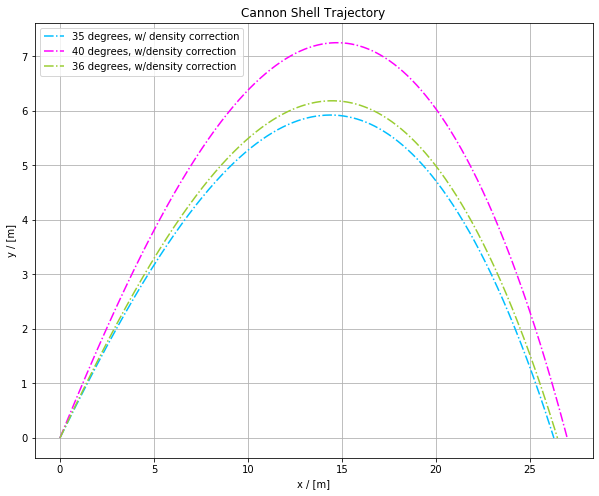

In [66]:
# Problem 5 - Baseball, Motion of a Batted Ball - a)

# Dr. Wood-- so this cell definitely doesn't produce the correct results. I just copied my code
# from above to just alter it here, and it's not working (definitely can tell by looking at the
# x and y ranges of values). I've been trying to figure it out/alter t for a few days,
# but I'm not sure what is going on. Shandi ended up helping me to get a version that does work, 
# which is in the next cell below. I really just don't know why this one doesn't work! But I thought 
# I would leave it to see if you can spot any obvious problems.

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

def f5(theta):
    
    vd = 35 # [m/s]
    delta = 5 # [m/s]
    
    dt = 0.0001 # to even get a parabola on the plot, I have to make my dt this small... weird

    x_points = [0.0] # initializing our x and y while also making a list
    y_points = [0.0]

    v_initial = [49.0] # same as above but with our initial velocity

    vx = [49.0 * np.cos(theta)] # calculating the specific x and y components of velocity
    vy = [49.0 * np.sin(theta)]
    
    while y_points[-1] >= 0:                         # using a while loop to keep calculating until y is 0--
        x_new = x_points[-1] + vx[-1]*dt             # i.e. until the shell hits the ground.
        drag = 0.0039 + (0.0058 / 1 + np.exp((v_initial[-1]-35)/5))
        vx_new = vx[-1] - (drag*v_initial[-1]*vx[-1]*dt)
        y_new = y_points[-1] + vy[-1]*dt                      # just calculating each new position and velocity
        vy_new = vy[-1] - g*dt - (drag*v_initial[-1]*vy[-1]*dt)    # and appending each value.
        v_new = np.sqrt(vx_new**2 + vy_new**2)
    
        x_points.append(x_new)
        vx.append(vx_new)
        y_points.append(y_new)
        vy.append(vy_new)
        v_initial.append(v_new)

    return (x_points, y_points) 

theta1 = 35 * (np.pi/180)
vals123 = f5(theta1)

theta2 = 40 * (np.pi/180)
vals223 = f5(theta2)

theta3 = 36 * (np.pi/180)
vals224 = f5(theta3)

fig = plt.figure(figsize=[10, 8])
plt.plot(vals123[0], vals123[1], '-.', color='deepskyblue', label='35 degrees, w/ density correction')
plt.plot(vals223[0], vals223[1], '-.', color='magenta', label='40 degrees, w/density correction')
plt.plot(vals224[0], vals224[1], '-.', color='yellowgreen', label='36 degrees, w/density correction')
plt.title('Cannon Shell Trajectory')
plt.xlabel('x / [m]')
plt.ylabel('y / [m]')
plt.legend()
plt.grid()
plt.show()

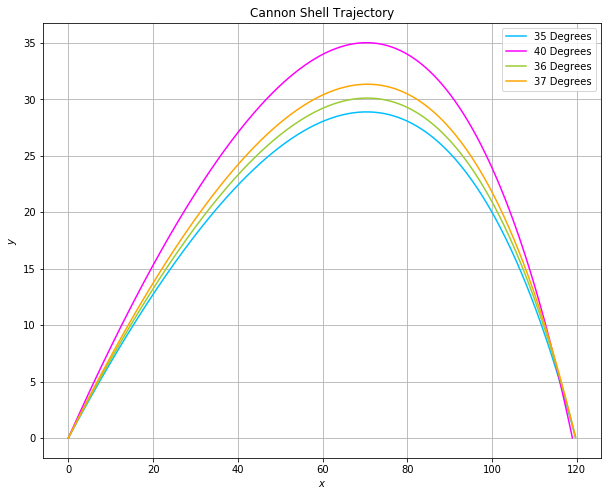

Max Range happens at 36 degrees.


In [67]:
# Problem 5 - Baseball, Motion of a Batted Ball - a)
# this one works!

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

dt = 0.01 # small time step
v_initial = 49 # [m/s] I
xy_points = [] # trajectories with drag

# solving the trajectories with the drag force 

for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    x_points = []
    y_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        
        x_initial += vx*dt
        vx -= drag*v*vx*dt
        y_initial += vy*dt
        vy -= (g+drag*v*vy)*dt
        t += dt       
        
    xy_points.append([x_points, y_points])

fig = plt.figure(figsize=[10, 8])
plt.plot(xy_points[35][0], xy_points[35][1], color='deepskyblue', label='35 Degrees')
plt.plot(xy_points[40][0], xy_points[40][1], color='magenta', label='40 Degrees')
plt.plot(xy_points[36][0], xy_points[36][1], color='yellowgreen', label='36 Degrees')
plt.plot(xy_points[37][0], xy_points[37][1], color='orange', label='37 Degrees')
plt.title('Cannon Shell Trajectory')
#plt.xlim(118, 120)
plt.xlabel("$x$")
plt.ylabel("$y$") 
plt.legend()
plt.grid()
plt.show()

# if we limit the x range to be from 118 to 120, we can visually see that the angle with the largest range is
# 36 degrees.

print('Max Range happens at 36 degrees.')

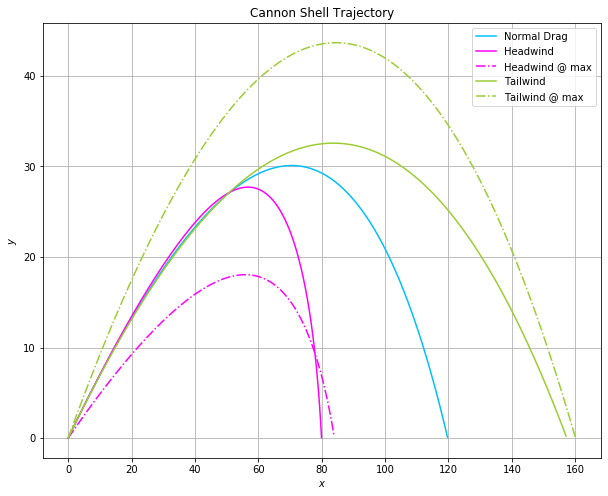

Max Range for normal drag happens at 36 degrees.
Max Range for headwind happens at 27 degrees.
Max Range for tailwind happens at 44 degrees.


In [68]:
# Problem 5 - Baseball, Motion of a Batted Ball - b)

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

dt = 0.01 # small time step
v_initial = 49 # [m/s] I
xy_points = [] # trajectories with drag
xy_points_headwind = []
xy_points_tailwind = []
headwind = -11.176
tailwind = 10.729

# normal drag trajectory:

for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    x_points = []
    y_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        
        x_initial += vx*dt
        vx -= drag*v*vx*dt
        y_initial += vy*dt
        vy -= (g+drag*v*vy)*dt
        t += dt       
        
    xy_points.append([x_points, y_points])
    
# trajectory with headwind:

for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    x_points = []
    y_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        
        x_initial += vx*dt
        vx -= drag*np.abs(v-headwind)*(vx-headwind)*dt
        y_initial += vy*dt
        vy -= (g+drag*np.abs(v-headwind)*vy)*dt
        t += dt       
        
    xy_points_headwind.append([x_points, y_points])
               
# trajectory with tailwind:
               
for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    x_points = []
    y_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        
        x_initial += vx*dt
        vx -= drag*np.abs(v-tailwind)*(vx-tailwind)*dt
        y_initial += vy*dt
        vy -= (g+drag*np.abs(v-tailwind)*vy)*dt
        t += dt       
        
    xy_points_tailwind.append([x_points, y_points])

    
# now plotting:

fig = plt.figure(figsize=[10, 8])
plt.plot(xy_points[36][0], xy_points[36][1], color='deepskyblue', label='Normal Drag')
plt.plot(xy_points_headwind[36][0], xy_points_headwind[36][1], color='magenta', label='Headwind')
plt.plot(xy_points_headwind[27][0], xy_points_headwind[27][1], '-.', color='magenta', label='Headwind @ max')
plt.plot(xy_points_tailwind[36][0], xy_points_tailwind[36][1], color='yellowgreen', label='Tailwind')
plt.plot(xy_points_tailwind[44][0], xy_points_tailwind[44][1], '-.', color='yellowgreen', label='Tailwind @ max')
#plt.plot(xy_points[37][0], xy_points[37][1], color='orange', label='37 Degrees')
plt.title('Cannon Shell Trajectory')
plt.xlabel("$x$")
plt.ylabel("$y$") 
plt.legend()
plt.grid()
plt.show()

# again, after plotting different angles, we can visually see that the max ranges are as follows:

print('Max Range for normal drag happens at 36 degrees.')
print('Max Range for headwind happens at 27 degrees.')
print('Max Range for tailwind happens at 44 degrees.')

In [69]:
# Problem 5 - Baseball, Motion of a Batted Ball - c)

# necessary imports:

import numpy as np
from scipy.constants import g

# define constants:

t = 0
dt = 0.01 # define time step
v_initial = 44.704 # [m/s]
x_initial = 0
x_final = 18.4404 # [m]
theta = np.pi/180
vx = v_initial * np.cos(theta)
vy = v_initial * np.sin(theta)

while x_initial <= x_final:
    v = np.sqrt(vx**2 + vy**2)
    drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
    
    x_initial += vx*dt
    vx -= drag*v*vx*dt
    y_initial += vy*dt
    vy -= (g+drag*v*vy)*dt
    t += dt
    
print('The speed of the ball when it crosses home plate is', v, '[m/s]. The initial speed is ~45 [m/s], so it \n slows down by about 4 [m/s].')


The speed of the ball when it crosses home plate is 40.96343954016046 [m/s]. The initial speed is ~45 [m/s], so it 
 slows down by about 4 [m/s].


---

**Problem 6: Crosswind**

Consider the effect of a crosswind on the trajectory of a flyball.  How much will a wind of 10 mph directed at right angles to the initial velocity alter the place where one of the fly balls in the figure above?




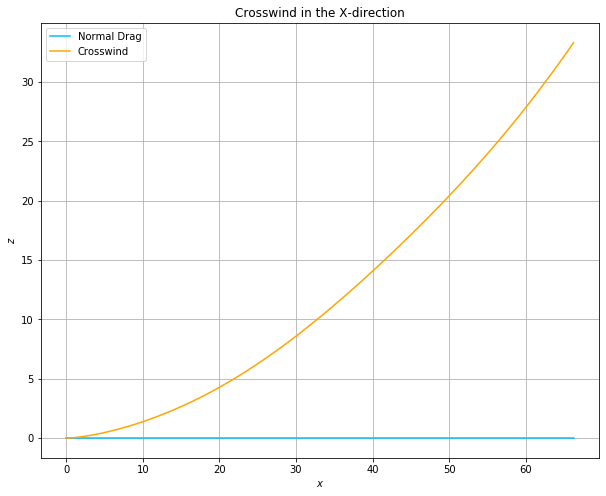

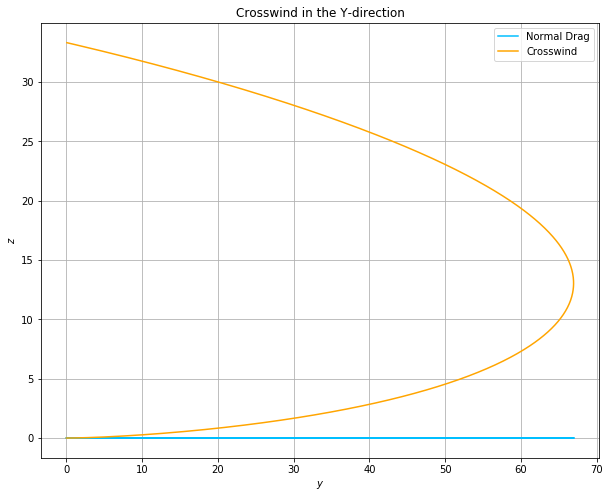

In [70]:
# Problem 6 - Crosswind

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

dt = 0.01 # small time step
v_initial = 49 # [m/s] I
xy_points = [] # trajectories with drag
xy_points_crosswind = []

# trajectory with normal drag:

for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    z_initial = 0
    x_points = []
    y_points = []
    z_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        z_points.append(z_initial)
        
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        
        x_initial += vx*dt
        vx -= drag*v*vx*dt
        y_initial += vy*dt
        vy -= (g+drag*v*vy)*dt
        z_initial += 0
        vz = 0
        t += dt       
        
    xy_points.append([x_points, y_points, z_points])
    
# trajectory with crosswind:

for theta in range(0,91,1):
    t = 0
    x_initial = 0
    y_initial = 0
    z_initial = 0
    x_points = []
    y_points = []
    z_points = []
    theta *= np.pi/180
    vx = v_initial * np.cos(theta)
    vy = v_initial * np.sin(theta)
    
    while y_initial >= 0:
        x_points.append(x_initial)
        y_points.append(y_initial)
        z_points.append(z_initial)
        
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        drag = 0.0039+0.0058/(1+np.exp((v-35)/5)) 
        z_initial += (np.sqrt(x_initial + y_initial)*dt) / 2
        
        x_initial += vx*dt
        vx -= drag*v*vx*dt
        y_initial += vy*dt
        vy -= (g+drag*v*vy)*dt
        vz = 0
        t += dt       
        
    xy_points_crosswind.append([x_points, y_points, z_points])
    
# now plotting below to show crosswind affects in both the x and y directions:

fig = plt.figure(figsize=[10, 8])
plt.plot(xy_points[71][0], xy_points[71][2], color='deepskyblue', label='Normal Drag')
plt.plot(xy_points_crosswind[71][0], xy_points_crosswind[71][2], color='orange', label='Crosswind')
plt.title('Crosswind in the X-direction')
plt.xlabel("$x$")
plt.ylabel("$z$")    
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=[10, 8])
plt.plot(xy_points[71][1], xy_points[71][2], color='deepskyblue', label='Normal Drag')
plt.plot(xy_points_crosswind[71][1], xy_points_crosswind[71][2], color='orange', label='Crosswind')
plt.title('Crosswind in the Y-direction')
plt.xlabel("$y$")
plt.ylabel("$z$")    
plt.legend()
plt.grid()
plt.show()

---

**Problem 7: Golf Drive**

In golf, the backspin of the driven ball gives a magnus force that can be stronger than the gravitational force (the trajectory curves upward).   The equations of motion for the golf ball are then

\begin{align}
\frac{dv_x}{dt} &= -\frac{F_{drag,x}}{m} - \frac{S_0\omega v_y}{m}\\
\frac{dv_y}{dt} &= -\frac{F_{drag,y}}{m} - \frac{S_0\omega v_x}{m} -g
\end{align}

Again the drag for a golf ball is a function of velocity, with $C\approx 1/2$ at low velocities ($v\le 14$ m/s) and $C\approx 7.0/v$ ($v$ in m/s) at high velocities ($>14$ m/s).  Use

$$F_{drag} = -C\rho A v^2$$

For the Magnus force, estimate $S_0\omega/m\approx 0.25\rm\ s^{-1}$. 

Again use the Euler method to integrate the trajectory.  Assume an initial velocity of 70 m/s.   Show that the maximum range occurs for a 'firing angle' that is surprisingly low.  Simulate extra backspin by increasing $S_0\omega/m$ by 50%, and no backspin by setting it to zero.  Finally, calculate the trajectory of a smooth ball by using the appropriate drag coefficient.  (in other words, try to recreate this figure)

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/golf-drive.png" />

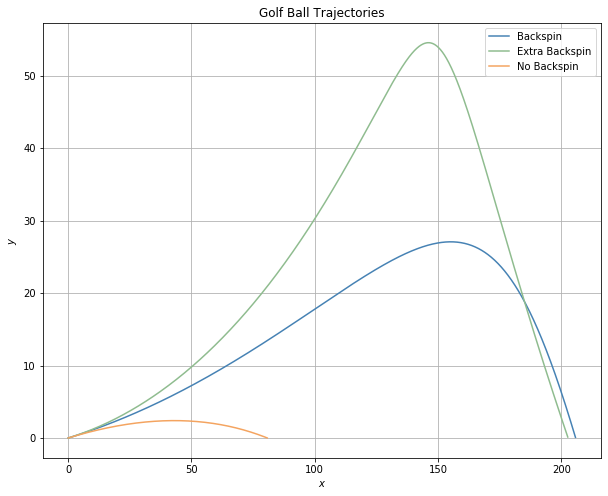

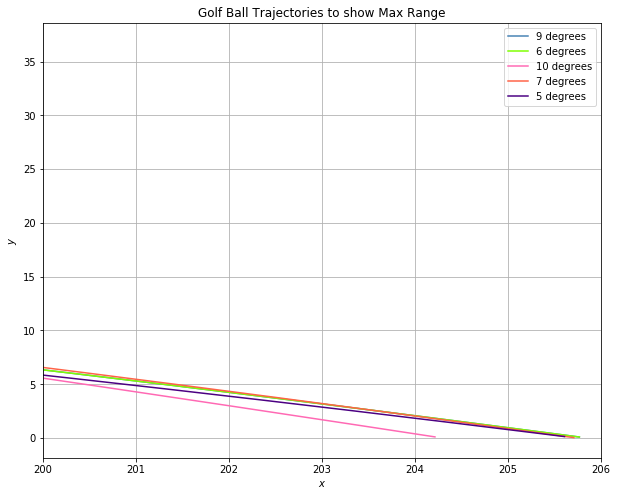

In [72]:
# Problem 7 - Golf Drive

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

m = 0.04593 # [kg] mass of golf ball
rho = 1.275 # density of air
radius = 0.002 # [m] radius of golf ball
A = np.pi*42.67e-3**2/4.0 # surface area of golf ball
v_initial = 70 # [m/s]

N = 10000
t_start = 0
t_end = 100
h = (t_end - t_start) / N

# now defining 3 functions-- one for 'normal' backspin, one for extra backspin, 
# and one with no backspin.

def backspin(r,t):
    S0 = 0.25 # [s^-1] magnus force
    
    x = r[0] # setting up all of the elements of the array
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    v = np.sqrt(vx**2 + vy**2)
    
    if abs(v) <= 14: # if statement to decide when the drag coefficient is 0.5
        C = 0.5      # and when it is 7.0 / v
    else: 
        C = 7.0 / v
        
    x_drag = C*rho*A*vx*v # now calculating the x and y components of the drag force
    y_drag = C*rho*A*vy*v
    
    fvx = -x_drag/m - S0*vy # and finally calculating the derivatives
    fvy = -y_drag/m + S0*vx - g
    
    return np.array([vx, vy, fvx, fvy], float)
    
def extra_backspin(r,t):
    S0 = 0.375 # [s^-1] magnus force
    
    x = r[0] # setting up all of the elements of the array
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    v = np.sqrt(vx**2 + vy**2)
    
    if abs(v) <= 14: # if statement to decide when the drag coefficient is 0.5
        C = 0.5      # and when it is 7.0 / v
    else: 
        C = 7.0 / v
        
    x_drag = C*rho*A*vx*v # now calculating the x and y components of the drag force
    y_drag = C*rho*A*vy*v
    
    fvx = (-x_drag/m) - S0*vy # and finally calculating the derivatives
    fvy = (-y_drag/m) + S0*vx - g
    
    return np.array([vx, vy, fvx, fvy], float)

def no_backspin(r,t):
    S0 = 0.0 # [s^-1] magnus force
    
    x = r[0] # setting up all of the elements of the array
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    v = np.sqrt(vx**2 + vy**2)
    
    if abs(v) <= 14: # if statement to decide when the drag coefficient is 0.5
        C = 0.5      # and when it is 7.0 / v
    else: 
        C = 7.0 / v
        
    x_drag = C*rho*A*vx*v # now calculating the x and y components of the drag force
    y_drag = C*rho*A*vy*v
    
    fvx = (-x_drag/m) - S0*vy # and finally calculating the derivatives
    fvy = (-y_drag/m) + S0*vx - g
    
    return np.array([vx, vy, fvx, fvy], float)

# now defining a function that does the RK4 method:

def RK4(t_start, t_end, backspin, theta): 
    t_points = np.arange(t_start, t_end, h)
    x_points = []
    y_points = []
    vx_points = []
    vy_points = []
    
    r = np.array([0.0, 0.0, 70*np.cos(theta*(np.pi/180)), 70*np.sin(theta*(np.pi/180))], float)
    
    for t in t_points:
        if r[1] >= 0:
            x_points.append(r[0])
            y_points.append(r[1])
            vx_points.append(r[2])
            vy_points.append(r[3])
    
            k1 = h * backspin(r, t)
            k2 = h * backspin(r + 0.5 * k1, t + 0.5 * h)
            k3 = h * backspin(r + 0.5 * k2, t + 0.5 * h)
            k4 = h * backspin(r + k3, t + h)
            r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return (x_points, y_points, vx_points, vy_points)

# now using that RK4 function to calculate trajectories for all of the different
# backspin functions we made earlier:

# after trial and error of printing, a firing angle of 9 degrees gives
# the max distance:

vals_backspin = RK4(t_start, t_end, backspin, 6) 
vals_extrabackspin = RK4(t_start, t_end, extra_backspin, 6)
vals_nobackspin = RK4(t_start, t_end, no_backspin, 6)

# and now plotting all three on the same plot:

fig = plt.figure(figsize=[10, 8])
plt.plot(vals_backspin[0], vals_backspin[1], color='steelblue', label='Backspin')
plt.plot(vals_extrabackspin[0], vals_extrabackspin[1], color='darkseagreen', label='Extra Backspin')
plt.plot(vals_nobackspin[0], vals_nobackspin[1], color='sandybrown', label='No Backspin')
plt.title('Golf Ball Trajectories')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

# now to show that a firing angle of 6 has the max distance-- am plotting
# the 'normal backspin' at different firing angles and limiting the x range
# from 200 to 206:

vals_backspin6 = RK4(t_start, t_end, backspin, 6)
vals_backspin10 = RK4(t_start, t_end, backspin, 10) 
vals_backspin7 = RK4(t_start, t_end, backspin, 7)
vals_backspin5 = RK4(t_start, t_end, backspin, 5)

fig = plt.figure(figsize=[10, 8])
plt.plot(vals_backspin[0], vals_backspin[1], color='steelblue', label='9 degrees')
plt.plot(vals_backspin6[0], vals_backspin6[1], color='chartreuse', label='6 degrees')
plt.plot(vals_backspin10[0], vals_backspin10[1], color='hotpink', label='10 degrees')
plt.plot(vals_backspin7[0], vals_backspin7[1], color='tomato', label='7 degrees')
plt.plot(vals_backspin5[0], vals_backspin5[1], color='indigo', label='5 degrees')
plt.xlim(200, 206)
plt.title('Golf Ball Trajectories to show Max Range')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

---
**Problem 0: Molecular Dynamics First Steps**

In class we viewed the Washington Post article showing a live simulator of the spread of COVID-19:

https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

This is a molecular dynamics (MD) simulation.  Your first steps down this path are

<ul>
    <li>Write Python code that will simulate the motion of a particle in a box (2D) with reflective boundary conditions (we will later do periodic boundary conditions)</li>
    <li>Write a Python function to initialize the positions and velocities of $N$ particles</li>
    <li>Write code to visualize the motions of the $N$ particles</li>
</ul>

Note:  This problem isn't graded, since it's going to be used later on - I just wanted to get you to start thinking about these things and working towards our eventual MD code ($N$ particles, periodic boundary conditions, interacting via a force law, with speed distribution histogram calculated every $N_{\rm samp}$ time steps.  

You may decide to do the problem in a compiled language, and that is fine as long as it is your work and it gives the same results (visualization) that the Python environment students will be getting.  I'm on a Mac, so probably won't be able to run the code that you compile.  You might elect in this case to turn in the code (emailing the .c, .cpp, or .f files is fine), and a movie that you made (e.g., link to youtube upload or Dropbox share).  

You may also decide to do this using vpython, and in fact the home page for vpython.org shows a particle in a box (3D) with reflecting boundary conditions to help get you started.